 
# Data Analysis Project: Marketing Analytics
 
## Fictional Context
 
**Disclaimer: the context I am going to present is not real, the CEO and the company only exist on my mind.**
 
I work in a campany where the professionals from the Marketing squad need to make a new marketing campaign, but they want the Data squad to make an analysis on the previous marketing campaigns data to find out what they should do. And these are the things I need to refute or validate.
 
1. Does US fare significantly better than the Rest of the World in terms of total purchases?
 
2. The CMO insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. I will justify or refute this statement using an appropriate analysis
 
3. Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?
 
4. What other factors are significantly related to amount spent on fish?
 
5. Is there a significant relationship between geographical regional and success of a campaign?
 
6. Which marketing campaign is most successful?
 
7. Which products are performing best?
 
8. Which channels are underperforming?

# 0.0 Preparation

## 0.1 Libraries

In [ ]:
 import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
 
%matplotlib inline
warnings.filterwarnings("ignore")

 ## 0.2 Loading the data

In [ ]:
df = pd.read_csv("https://github.com/MatheusRocha0/Marketing-Analytics/raw/main/marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## 0.3 Helper Functions

In [ ]:
 def addlabels(x, y):
   for i in range(len(x)):
      plt.text(i, y[i]//2, y[i], ha = "center", color = "white", fontsize = 15)

# 1.0 Data Cleaning

It is necessary to clean things from the dataset like missing values, outliers and etc since they can make us have a wrong idea about the data.

## 1.1 Replacing text

In [ ]:
df[" Income "] = df[" Income "].str.replace("$", "")
df[" Income "] = df[" Income "].str.replace(",", "")
df[" Income "] = df[" Income "].str.replace(".00", "")
df[" Income "] = df[" Income "].astype(np.float)

## 1.2 Converting data type into datetime object

In [ ]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

## 1.3 Treating Missing Values

In [ ]:
 
print("""How much missing values are there in variables?
Variable | Missing values""")
df.isnull().sum()

How much missing values are there in variables?
Variable | Missing values


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
df[" Income "].fillna(df[" Income "].mean(), inplace = True)

## 1.4 Treating Duplicates

In [ ]:
df.drop_duplicates(inplace = True)

# 2.0 Feature Engineering

Feature Engineering is the process of generating new variables from existing ones.

This can be very useful in my both analysis and machine learning cases.

In [ ]:
df["total_spent"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])

# 3.0 Data Analysis

It is now time to analyze the dataset. How will this analysis work?

I got hyphotesis about the data and I will use data visualization to refute or validate them.

## 3.1  Does US fare significantly better than the Rest of the World in terms of total purchases?

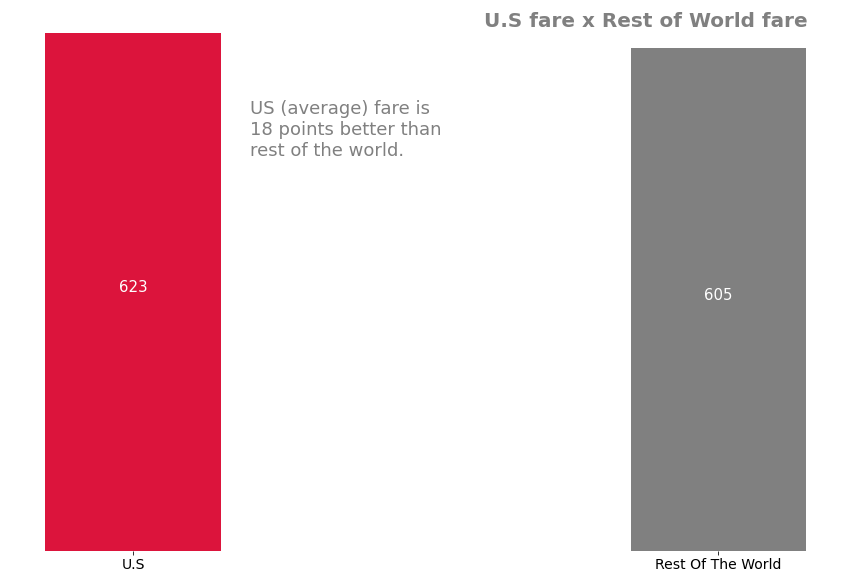

In [ ]:
 us_fare = df[df.Country == "US"]["total_spent"].mean()
rest_fare = df[df.Country != "US"]["total_spent"].mean()
 
labels = ["U.S", "Rest Of The World"]
values = [round(us_fare), round(rest_fare)]
 
colors = ["crimson", "gray"]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(labels, values, color = colors, width = .3)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize = 14)
plt.gca().axes.get_yaxis().set_visible(False)
 
addlabels(labels, values)
 
plt.text(s = "U.S fare x Rest of World fare", fontsize = 20, color = "gray", weight = "bold", x = .6, y = 630)
plt.text(fontsize = 18, color = "gray", x = 0.2, y = 450,
s = """
US (average) fare is 
18 points better than
rest of the world.
""")
 
plt.show()

## 3.2  The CMO insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. I will justify or refute this statement using an appropriate analysis

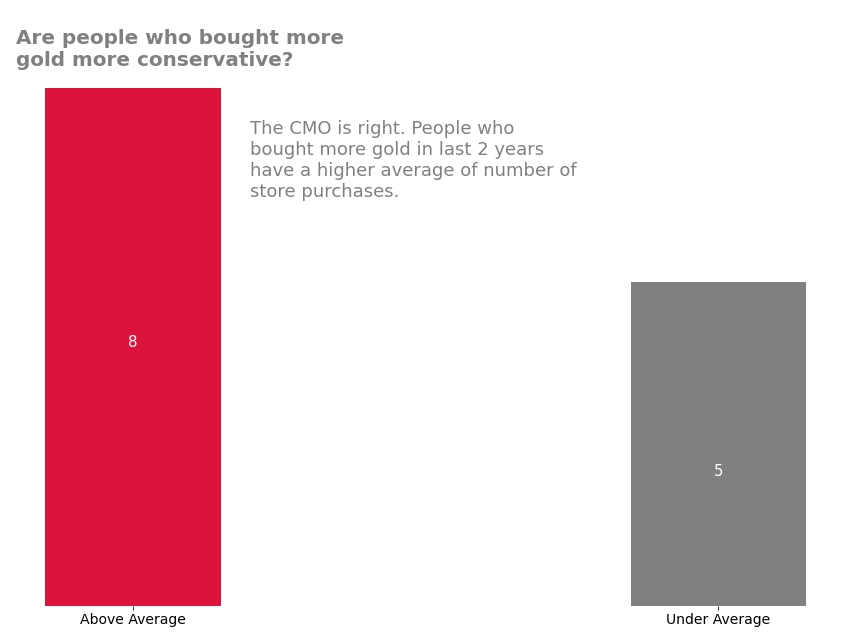

In [ ]:
 mean = df.MntGoldProds.mean()
 
above_avg = round(df[df.MntGoldProds > mean]["NumStorePurchases"].mean())
under_avg = round(df[df.MntGoldProds < mean]["NumStorePurchases"].mean())
 
labels = ["Above Average", "Under Average"]
values = [above_avg, under_avg]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(labels, values, color = colors, width = .3)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize = 14)
plt.gca().axes.get_yaxis().set_visible(False)
 
addlabels(labels, values)
plt.text(x = -.2, y = 8, fontsize = 20, weight = "bold", color = "gray", 
s = """
Are people who bought more 
gold more conservative?
""")
 
plt.text(x = 0.2, y = 6, fontsize = 18, color = "gray", s = 
"""
The CMO is right. People who
bought more gold in last 2 years
have a higher average of number of
store purchases.
""")
 
plt.show()

## 3.3  Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

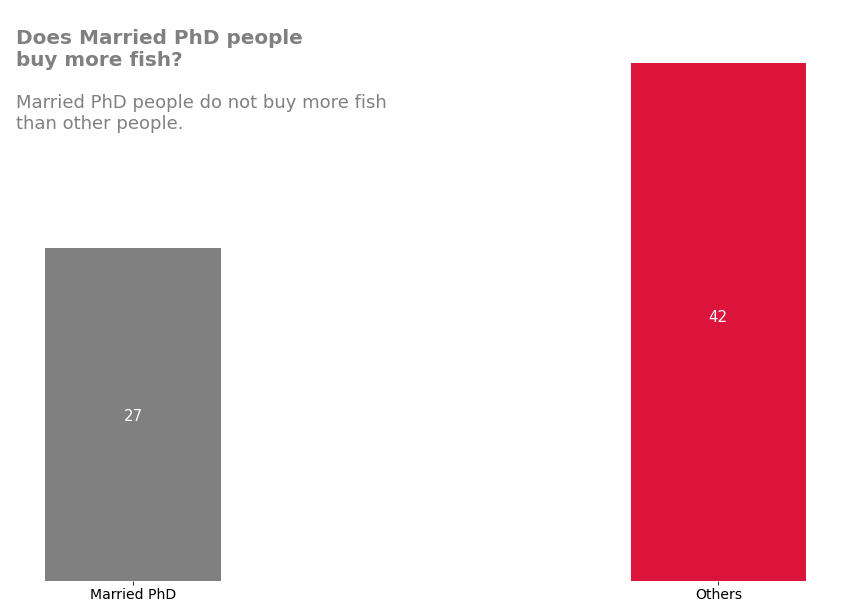

In [ ]:
 married_phd = round(df[(df.Education == "PhD") & (df.Marital_Status == "Married")]["MntFishProducts"].mean())
others = round(df[(df.Education != "PhD") & (df.Marital_Status != "Married")]["MntFishProducts"].mean())
 
labels = ["Married PhD", "Others"]
values = [married_phd, others]
 
colors = ["gray", "crimson"]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(labels, values, color = colors, width = .3)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize = 14)
plt.gca().axes.get_yaxis().set_visible(False)
 
addlabels(labels, values)
 
plt.text(x = -.2, y = 40, fontsize = 20, weight = "bold", color = "gray", 
s = """
Does Married PhD people 
buy more fish?
""")
 
plt.text(x = -.2, y = 35, fontsize = 18, color = "gray", s = 
"""
Married PhD people do not buy more fish
than other people.
""")
 
plt.show()

## 3.4 What other factors are significantly related to amount spent on fish?

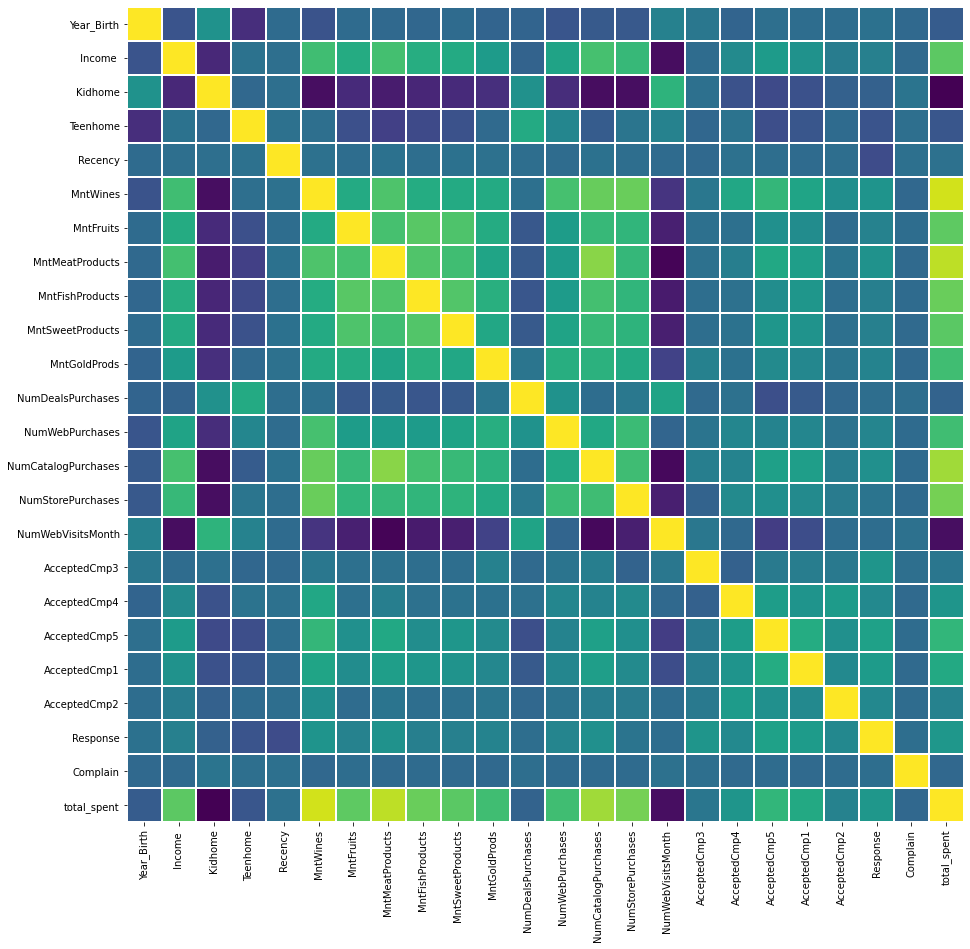

In [ ]:
 plt.figure(figsize = (15, 15))
sb.heatmap(df.drop(["ID"], axis = 1).corr(), linewidths = 1, cmap = "viridis", cbar = False)
plt.show()

## 3.5  Is there a significant relationship between geographical regional and success of a campaign?

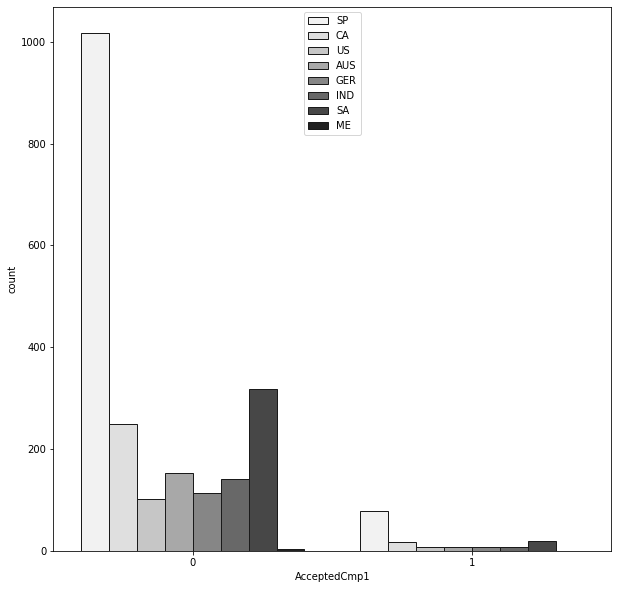

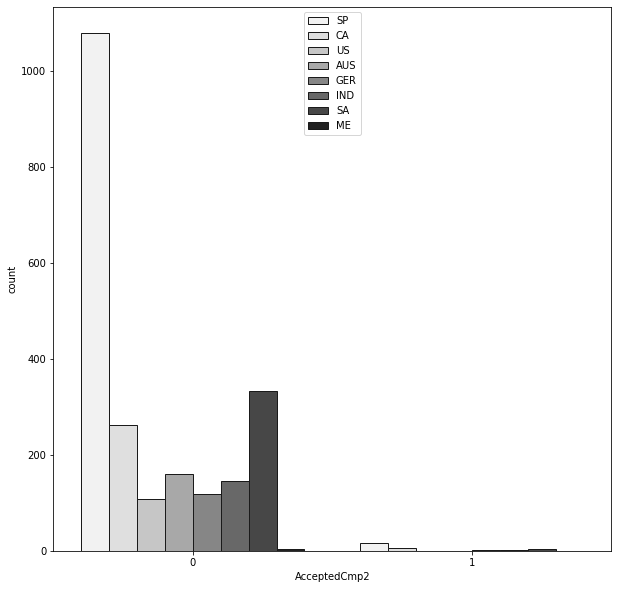

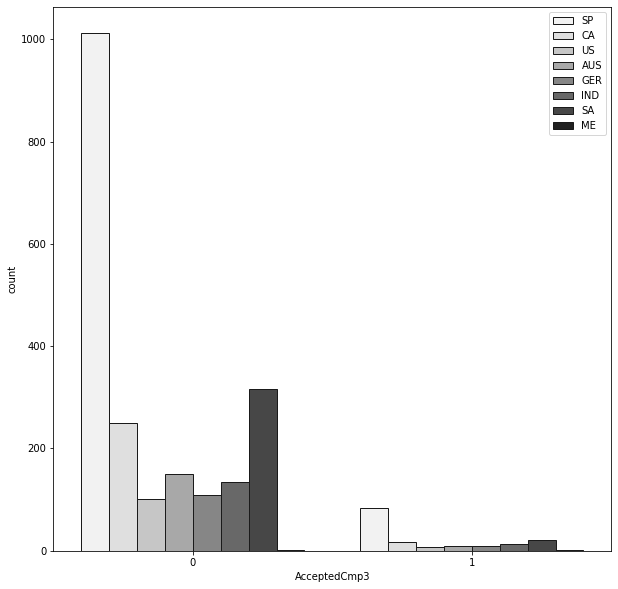

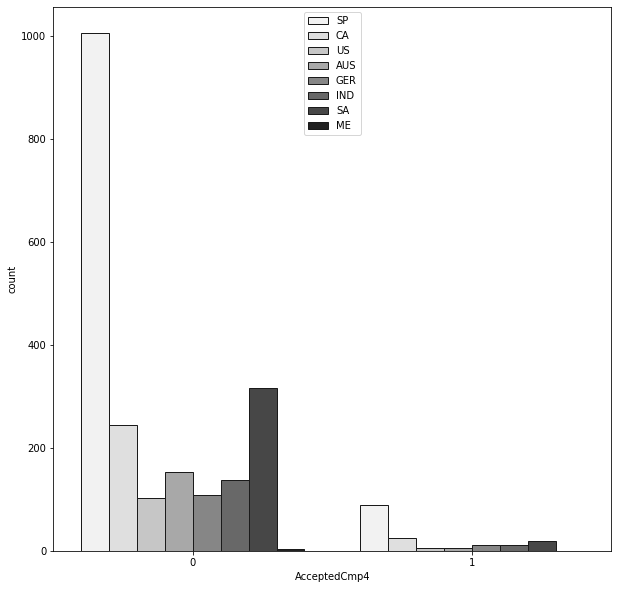

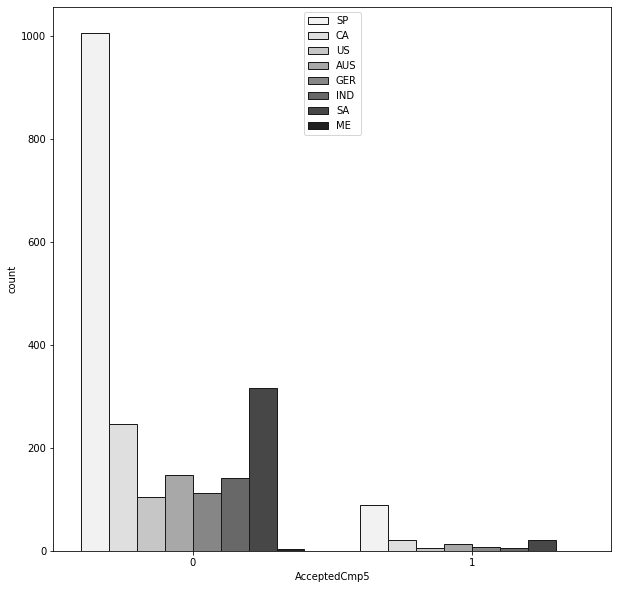

In [ ]:
 campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5']
 
for campaign in campaigns:
   plt.figure(figsize = (10, 10))
   sb.countplot(data = df, x = campaign, hue = "Country", palette = "Greys", edgecolor = ".1")
   plt.legend(loc = "best")
   plt.show()

## 3.6  Which marketing campaign is most successful?

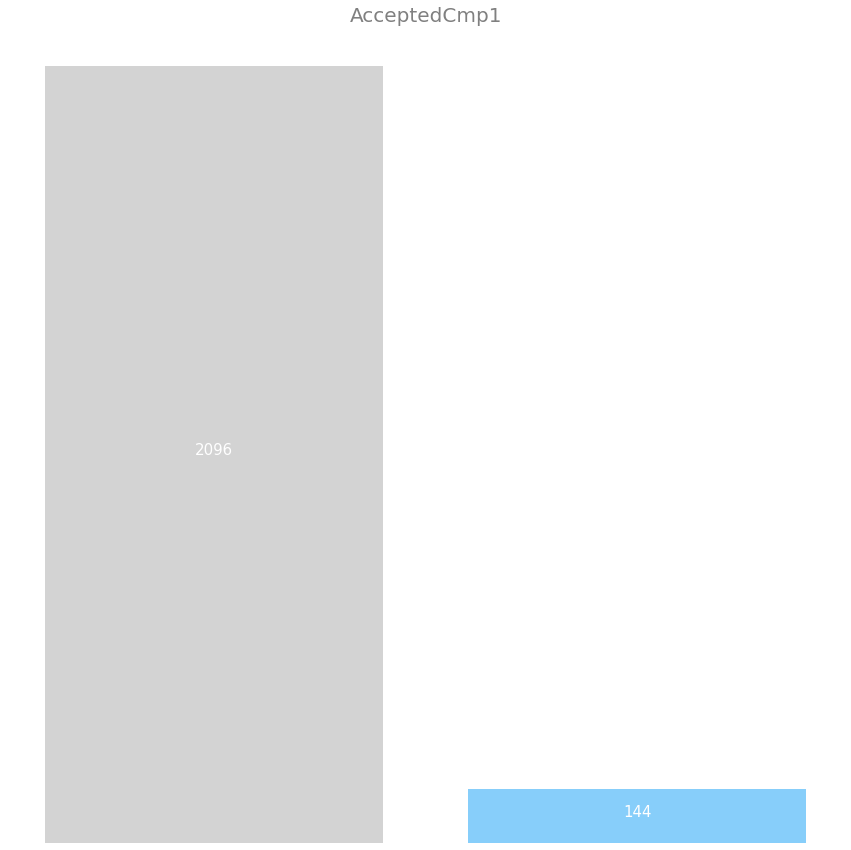

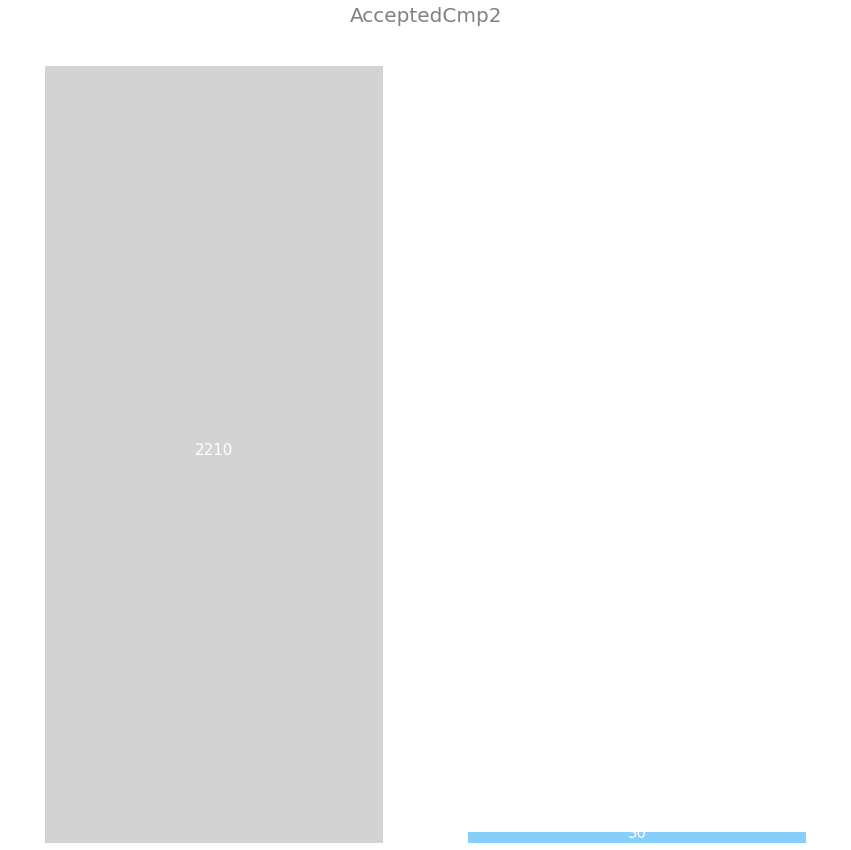

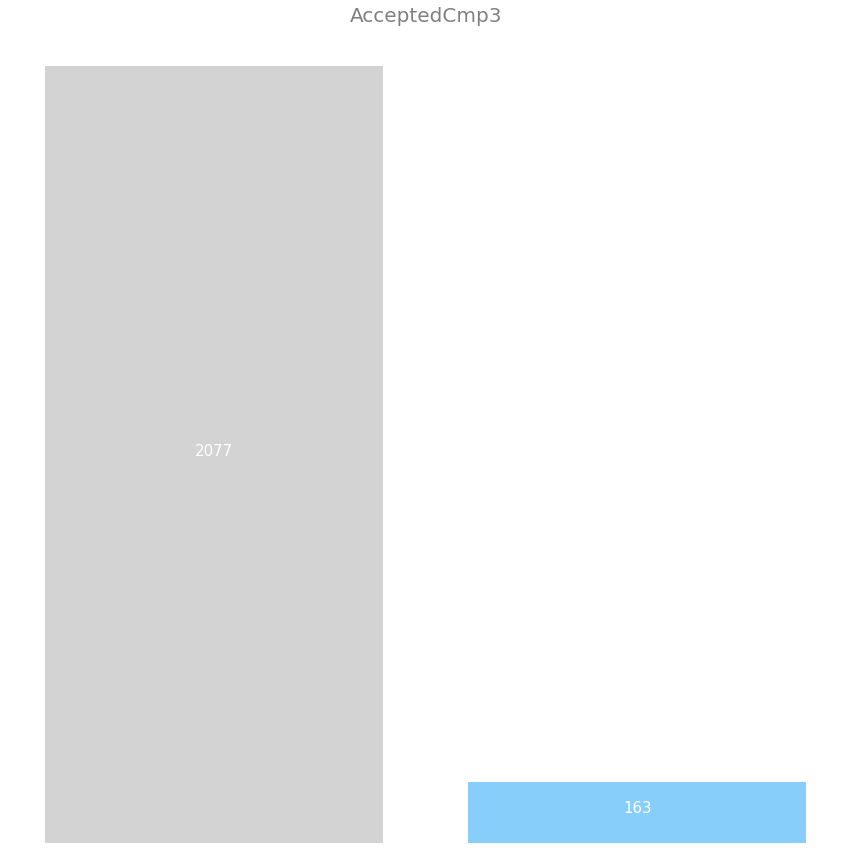

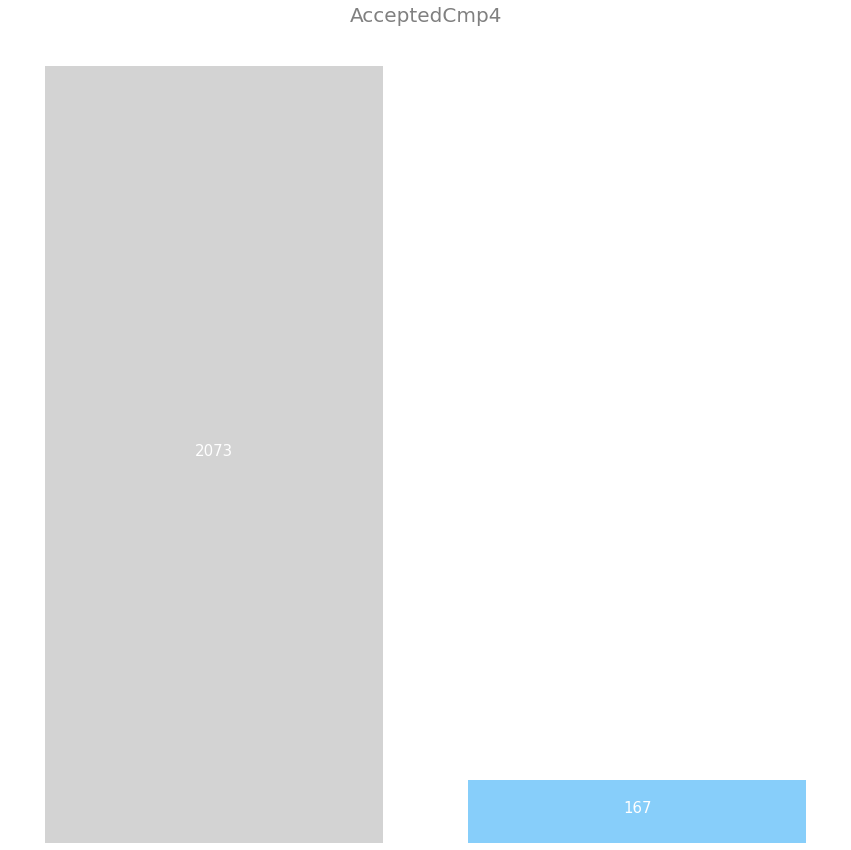

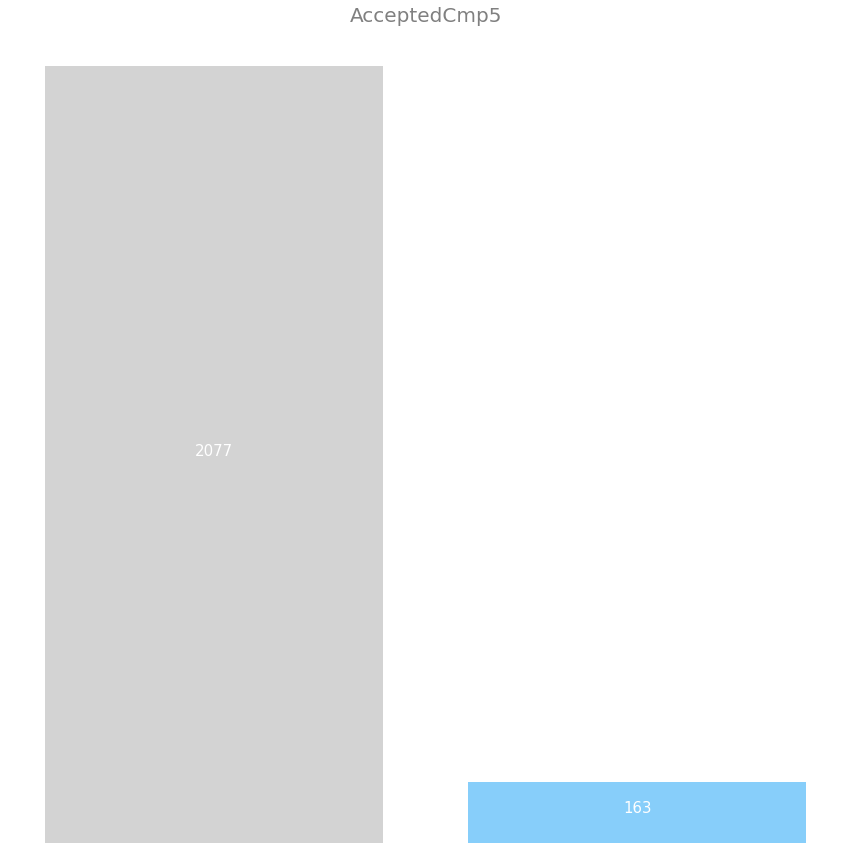

In [ ]:
 for campaign in campaigns:
   plt.figure(figsize = (15, 15))
   plt.title(campaign, fontsize = 20, color = "gray")
   ax = plt.subplot(111)
   data = df[campaign].value_counts()
   ax.bar(x = data.index, height = data.values, color = ["lightgray", "lightskyblue"])
   ax.spines["bottom"].set_visible(False)
   ax.spines["top"].set_visible(False)
   ax.spines["right"].set_visible(False)
   ax.spines["left"].set_visible(False)
   ax.tick_params(labelsize = 14)
   plt.gca().axes.get_yaxis().set_visible(False)
   plt.gca().axes.get_xaxis().set_visible(False)
   addlabels(data.index, data.values)
   plt.show()

## 3.7  Which products are performing best?

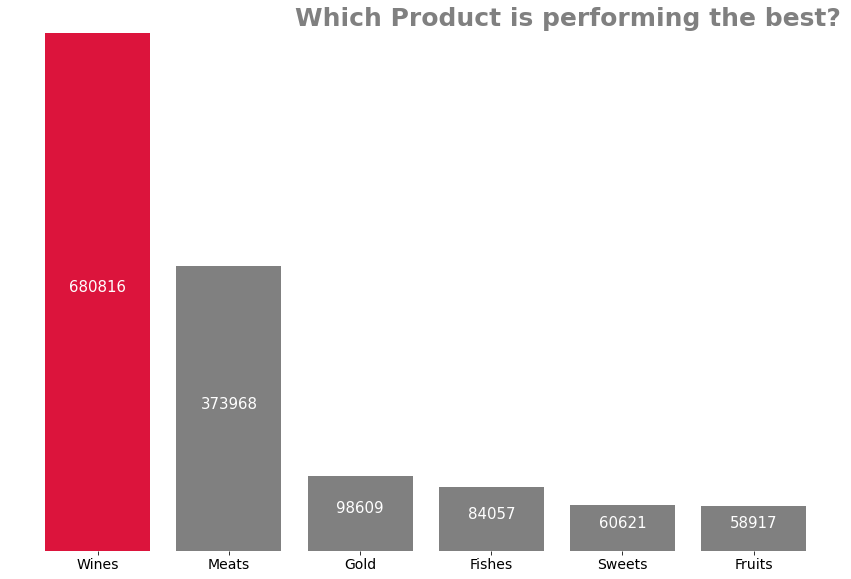

In [ ]:
 wines = df.MntWines.sum()
fruits = df.MntFruits.sum()
meats = df.MntMeatProducts.sum()
sweets = df.MntSweetProducts.sum()
fishes = df.MntFishProducts.sum()
gold = df.MntGoldProds.sum()
 
labels = ["Wines", "Meats", "Gold", "Fishes", "Sweets", "Fruits"]
values = [wines, meats, gold, fishes, sweets, fruits]
 
colors = []
 
for i in range(len(labels)):
   if values[i] == np.max(values):
      colors.append("crimson")
 
   else:
      colors.append("gray")
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(labels, values, color = colors)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize = 14)
plt.gca().axes.get_yaxis().set_visible(False)
addlabels(labels, values)
 
plt.text(
s = "Which Product is performing the best?",
x = 1.5, y = 690000, weight = "bold", color = "gray", fontsize = 25
)
 
plt.show()

## 3.8  Which channels are underperforming?

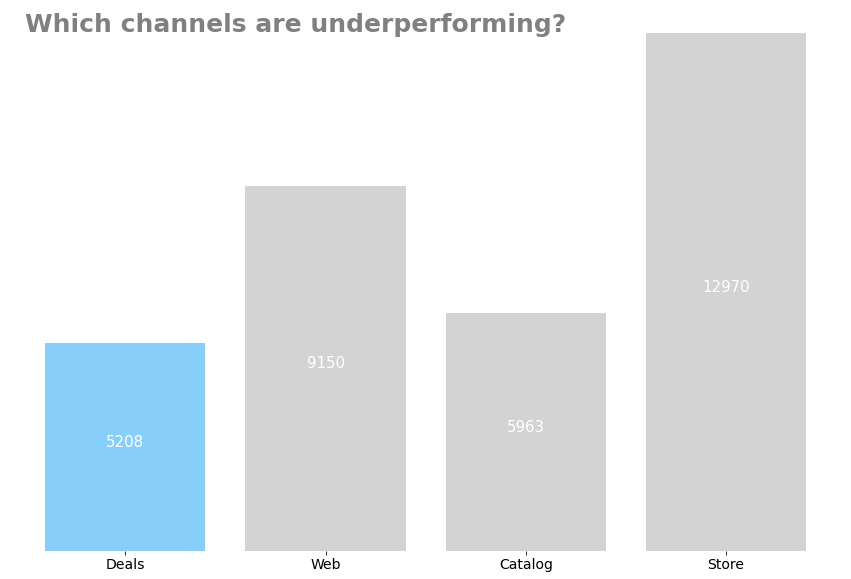

In [ ]:
 deals = df.NumDealsPurchases.sum()
web = df.NumWebPurchases.sum()
catalog = df.NumCatalogPurchases.sum()
store = df.NumStorePurchases.sum()
 
labels = ["Deals", "Web", "Catalog", "Store"]
values = [deals, web, catalog, store]
 
colors = []
 
for i in range(len(labels)):
   if values[i] == np.min(values):
      colors.append("lightskyblue")
 
   else:
      colors.append("lightgray")
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(labels, values, color = colors)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize = 14)
plt.gca().axes.get_yaxis().set_visible(False)
addlabels(labels, values)
 
plt.text(s = "Which channels are underperforming?",
x = -.5, y = 13000, fontsize = 25, weight = "bold", color = "gray")
 
plt.show()

# 4.0 Report
 
1. Amount spent in products, income and have accepted campaigns are the most import factors related to number of purchases.
 
2. United States is the second worst country considering both purchases and amount spent. Married PhD people probably do not buy more fish than the average.
 
3. The CMO is right and the people who spend much money buying gold have more purchases.
Factors related to fish sales are the same related to total purchases.
 
4. The denial of the campaign is the same since the first until the last one. SP (probably stands for Spain) is the country that most denies campaigns but at the same time is the country that most accepts campaigns. Also it is the country with the greatest number of total purchases and total spent.
 
5. The last campaign is the most successful by far, while the second campaign is the most failed. The others have a similar result.
 
6. Meat and Wine are the most selling products. 
 
7. Web and Store are the most successful channels.
 
8. Most of customers did not complain in the last 2 years.
 
# 5.0 Recommendations to CMO
 
1. Avoid campaigns like the second one.
 
2. Do more like the last one.
 
3. Focus in SP country..
 
4. Try selling more Wine and Meat.

# **That's All**